In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## Exploring the data

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.shape

(891, 12)

In [5]:
data_test.shape

(418, 11)

In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Problem Definition

I have a training dataset with 891 samples (people) who embarked the titanic. I want to predict who is more likely to die according to the features I have about them and find some correlation with what I know.

In [8]:
# To check the missing values and data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values in Age, Cabin and embarked.

In [9]:
# Info about numerical values
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data_train['PassengerId'].nunique()

891

In [11]:
data_train['Ticket'].nunique()

681

In [12]:
# Info about categorical values
data_train.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
# Drop columns of unique values: not necessary for this use case
data_train.drop(columns='PassengerId', inplace=True)

# Also drop ticket number since we have information about family on board so no need to have the ticket number (almost unique)
data_train.drop(columns='Ticket', inplace=True)

#Drop Cabin since 80% missing values and out of the none missing appears at most 4 times
data_train.drop(columns='Cabin', inplace=True)

In [14]:
# Let's split into numerical and categorical features 
cat = ['Survived','Sex','Embarked','Pclass']
# Not using 'name' and'cabin' for now since almost unique, I might extract features from them
num = data_train.drop(columns=cat+['Name']).columns

### Data Distribution

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E 

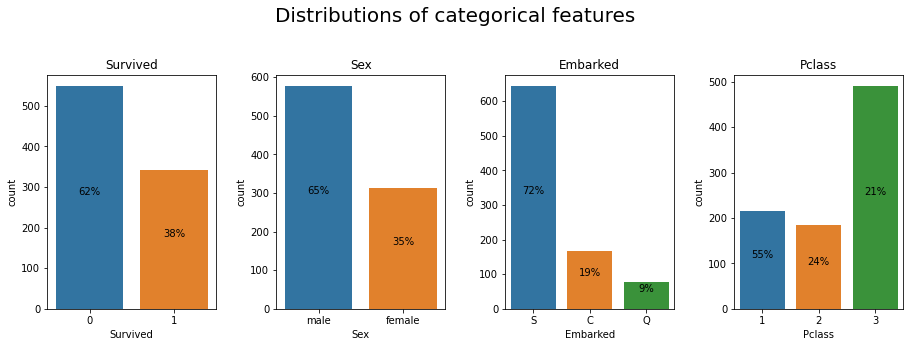

In [15]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Distributions of categorical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    g = sns.countplot(data_train[col], ax=ax)
    ax.set_title(col)
    for j,p in enumerate(g.patches):
        g.annotate(format((data_train[col].value_counts()/data_train[col].count()).iloc[j], '.0%'), \
                   (p.get_x() + p.get_width() / 2., \
                    p.get_height()/2 -10), \
                   ha = 'center', \
                   va = 'center', \
                   xytext = (0, 10), \
                   textcoords = 'offset points')
plt.tight_layout(pad=2)

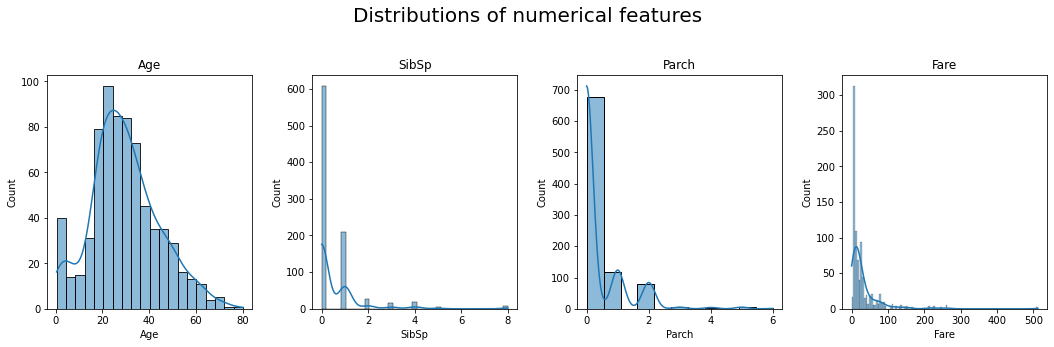

In [16]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Distributions of numerical features', fontsize=20)
num_cols = 4
num_rows = 1

for i, col in enumerate(num):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_train[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout(pad=2)


Most people in the data set are between 20 to 40 <br>
Most dont have siblings <br>
most dont have parents nor children onboard <br>
Most paid more than 0 and less than 100 (0 has to be investigated)

### Data Distribution against the dependent variable (Survived)

In [17]:
for c in cat:
    print(pd.crosstab(data_train[c],data_train['Survived']).apply(lambda x: round(x/x.sum(),2), axis=1), '\n\n')

Survived    0    1
Survived          
0         1.0  0.0
1         0.0  1.0 


Survived     0     1
Sex                 
female    0.26  0.74
male      0.81  0.19 


Survived     0     1
Embarked            
C         0.45  0.55
Q         0.61  0.39
S         0.66  0.34 


Survived     0     1
Pclass              
1         0.37  0.63
2         0.53  0.47
3         0.76  0.24 




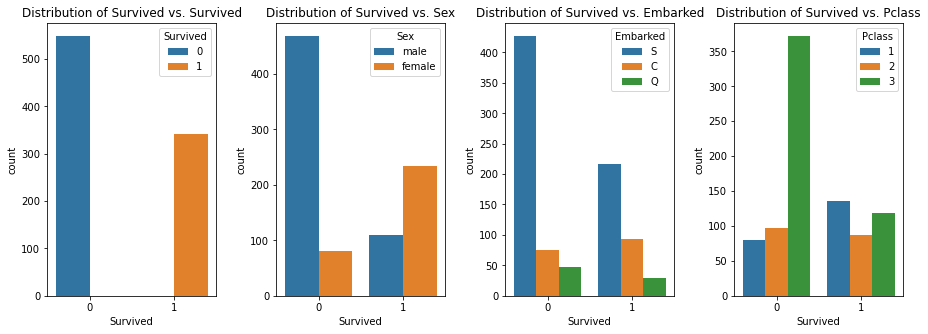

In [18]:
fig = plt.figure(figsize=(13, 5))
num_cols = 4
num_rows = 1

for i, c in enumerate(cat):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.countplot(x = data_train['Survived'],  hue = data_train[c], data=data_train, ax=ax)
    ax.set_title('Distribution of Survived vs. {}'.format(c))
plt.tight_layout(pad=2)

Very interesting results: female have a survival rate higher than male, those who embarked in C are more likely to survive than the others and those in class 1 also. Could mean that the people in class 1 were the one that were saved first.

In [19]:
data_train[['Age', 'SibSp', 'Parch', 'Fare','Survived']].groupby('Survived').agg(['mean', 'median'])

Age            SibSp            Parch              Fare       
               mean median      mean median      mean median       mean median
Survived                                                                      
0         30.626179   28.0  0.553734    0.0  0.329690    0.0  22.117887   10.5
1         28.343690   28.0  0.473684    0.0  0.464912    0.0  48.395408   26.0

The mean and median age are very close for survival rate <br>
The mean of siblings and parents are less than 1 for both survived and not survived <br>
We can see that the people who survived have higher mean and median fare. I saw that people in first class have higher survival rate so it makes sense.

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_10272/2449149805.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr, dtype=np.bool))


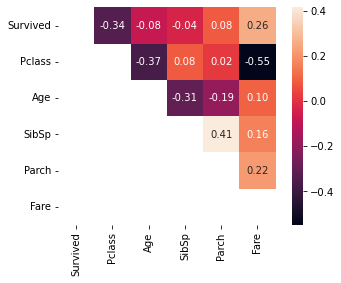

In [20]:
# Correlation between numerical values
corr = data_train.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(data_train.corr(), annot=True, fmt=".2f", mask = mask, square = True)

We have a high negative correlation between fare and Pclass (makes sense since higher the class (actually lower class: 3<1) lower fare). Still I won't remove this column since not enough correlated

## None Values

In [21]:
# percentage of none values in columns containing none values
data_train.isna().sum()[data_train.isna().sum()>0]/data_train.shape[0]

Age         0.198653
Embarked    0.002245
dtype: float64

### Embarked

In [22]:
data_train[data_train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [23]:
100*data_train.groupby('Pclass')['Embarked'].value_counts()/data_train.groupby('Pclass')['Embarked'].count()

Pclass  Embarked
1       S           59.345794
        C           39.719626
        Q            0.934579
2       S           89.130435
        C            9.239130
        Q            1.630435
3       S           71.894094
        Q           14.663951
        C           13.441955
Name: Embarked, dtype: float64

I see that for every class most people embarked through S, so there is not so much correlation with th class since you have similar distributions (Only for class 2 where 90% embarked through S)

In [24]:
data_train.groupby('Embarked')['Fare'].agg(['mean', 'median', 'max'])

,mean,median,max
Embarked,,,
C,59.954144,29.70,512.3292
Q,13.276030,7.75,90.0000
S,27.079812,13.00,263.0000


Highest fare embarked through gate C. For both of our None value we get higher fare than the mean for C so I will replace the None values by C

In [25]:
data_train['Embarked'].fillna('C', inplace=True)

In [26]:
data_train.isna().sum()[data_train.isna().sum()>0]/data_train.shape[0]

Age    0.198653
dtype: float64

### Age

In [27]:
data_train['Age'].nunique()

88

The age was negatively correlated to the nu;ber of siblings on board.

In [28]:
data_train['SibSp'].nunique()

7

In [29]:
data_train.groupby('SibSp')['Age'].agg(['mean', 'median','min', 'max'])

,mean,median,min,max
SibSp,,,,
0,31.397558,29.0,0.42,80.0
1,30.089727,30.0,0.67,70.0
2,22.620000,23.0,0.75,53.0
3,13.916667,9.5,2.00,33.0
4,7.055556,6.5,1.00,17.0
5,10.200000,11.0,1.00,16.0
8,NaN,NaN,NaN,NaN


In [30]:
data_train[data_train['SibSp']==8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,S


I will replace by the median (since age) and when SibSp is 8 I will replace it by the minimum age (since later I will bucket the ages)

In [31]:
data_train['Age'].fillna(data_train.groupby('SibSp')['Age'].transform('median'), inplace=True)
data_train['Age'].fillna(data_train['Age'].min(), inplace=True)

In [32]:
data_train.isna().sum()[data_train.isna().sum()>0]/data_train.shape[0]

Series([], dtype: float64)

## Preprocessing

### Feature Engineering

In [33]:
data_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Separate the ages into 4 buckets : 'baby' : 0-20,'young': 20-40,'not_so_young':40-60, 'old':60-80

In [34]:
data_train['Age_cut'] = pd.cut(data_train['Age'], 4, labels = ['baby','young','not_so_young', 'old'])

In [35]:
data_train['Age_cut']

0      young
1      young
2      young
3      young
4      young
       ...  
886    young
887     baby
888    young
889    young
890    young
Name: Age_cut, Length: 891, dtype: category
Categories (4, object): ['baby' < 'young' < 'not_so_young' < 'old']

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_cut', ylabel='count'>

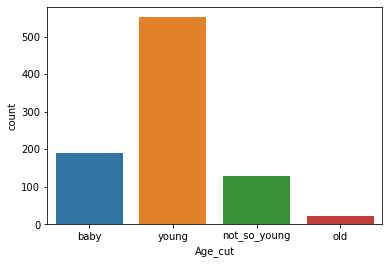

In [36]:
sns.countplot(data_train['Age_cut'])

I will keep both columns and try a model with both separately

Extracting the titles from the names

In [37]:
import re

In [38]:
data_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

the title is always followed by a point

In [39]:
data_train['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [40]:
data_train['Title'] = data_train['Name'].apply(lambda name: re.search('([A-Za-z]+)\.', name).group(1))

In [41]:
# Check if all not None
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    object  
 9   Age_cut   891 non-null    category
 10  Title     891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 70.8+ KB


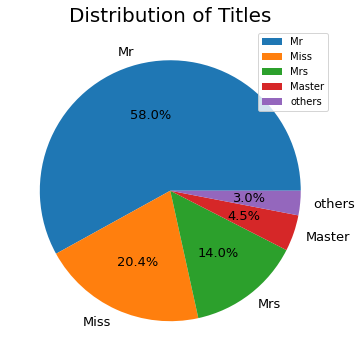

In [42]:
plt.figure(figsize=(6,6))
plt.pie(data_train['Title'].value_counts()[data_train['Title'].value_counts().values > 8].values.tolist() + [data_train['Title'].value_counts()[data_train['Title'].value_counts().values < 9].values.sum()],
        labels=data_train['Title'].value_counts()[data_train['Title'].value_counts().values > 8].index.tolist() + ['others'],
        autopct='%1.1f%%',
        textprops={'fontsize': 13})
plt.legend()
plt.title('Distribution of Titles', size=20)
plt.show()

In [43]:
# No more need of the columns name
data_train.drop(columns='Name',inplace=True)

In [44]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_cut', 'Title'],
      dtype='object')

In [45]:
target = 'Survived'
X = data_train.drop(columns=[target])
y = data_train[target]

In [46]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=.2,
                     random_state=42)

C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L E N O V O\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


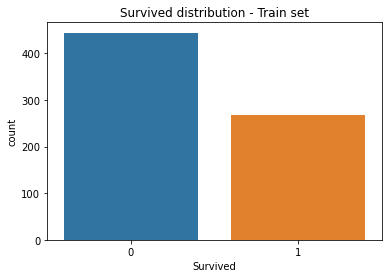

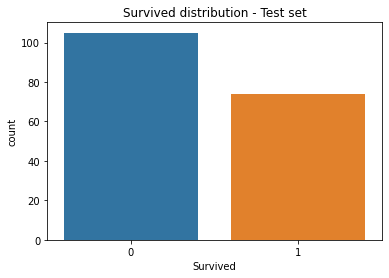

In [162]:
# Check if good split: 
plt.figure()
sns.countplot(y_train)
plt.title(target + ' distribution - Train set')
plt.xlabel(target);

plt.figure()
sns.countplot(y_test)
plt.title(target + ' distribution - Test set')
plt.xlabel(target);


## Preprocessing

## categorical to numerical

In [163]:
cat

['Sex', 'Embarked', 'Pclass', 'Age_cut', 'Title']

In [164]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_cut',
       'Title'],
      dtype='object')

In [165]:
cat = ['Sex', 'Embarked', 'Pclass', 'Age_cut', 'Title']

In [166]:
X_train = pd.get_dummies(X_train, columns = cat)

X_test = pd.get_dummies(X_test, columns = cat)

In [167]:
# Need to make sure I have the same columns in test and train
cols_to_add = set(X_train.columns) - set(X_test.columns)
cols_to_del = set(X_test.columns) - set(X_train.columns)

In [168]:
cols_to_add

{'Title_Capt',
 'Title_Col',
 'Title_Countess',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Ms'}

In [169]:
cols_to_del

{'Title_Don', 'Title_Jonkheer', 'Title_Sir'}

In [170]:
for col in cols_to_add:
    X_test[col] = 0

X_test.drop(columns=cols_to_del, inplace=True)

In [171]:
assert (X_test.columns == X_train.columns).any()

In [172]:
cols_to_add = set(X_train.columns) - set(X_test.columns)
cols_to_del = set(X_test.columns) - set(X_train.columns)

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

## Modeling

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [195]:
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.82      0.76      0.79        80

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



I tried different models and Random Forest with scaled data clearly gives me better results